In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
cDataset = pd.read_csv('Canadian Burned area pixels count.csv')
ecDataset = pd.read_csv('Eastern Canadian Burned area pixels count.csv')
ecDataset.index = pd.to_datetime(ecDataset['system:index'], format="%Y_%m_%d_%H")
cDataset.index = pd.to_datetime(cDataset['system:index'], format="%Y_%m_%d_%H")
ecDataset = ecDataset.drop(['system:index', '.geo'], axis=1)
cDataset = cDataset.drop(['system:index', '.geo'], axis=1)

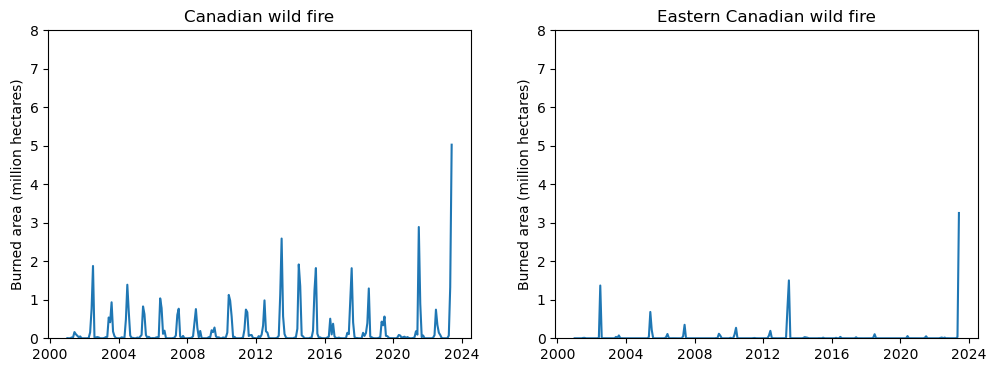

In [28]:
fig,ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(cDataset.index, cDataset['count']*500*500/10000/1e6)
ax[0].set_ylim(0, 8)
ax[0].set_ylabel('Burned area (million hectares)')
ax[0].set_title('Canadian wild fire')
ax[1].plot(ecDataset.index, ecDataset['count']*500*500/10000/1e6)
ax[1].set_ylim(0, 8)
ax[1].set_ylabel('Burned area (million hectares)')
ax[1].set_title('Eastern Canadian wild fire')
plt.show()

In [29]:
dates = pd.to_datetime(ecDataset.index)
ecDataset2 = ecDataset.pivot_table(index=[dates.month, dates.day], columns=dates.year, values='count')
ecDataset2.index.names = ['Month', 'day']
cDataset2 = cDataset.pivot_table(index=[dates.month, dates.day], columns=dates.year, values='count')
cDataset2.index.names = ['Month', 'day']

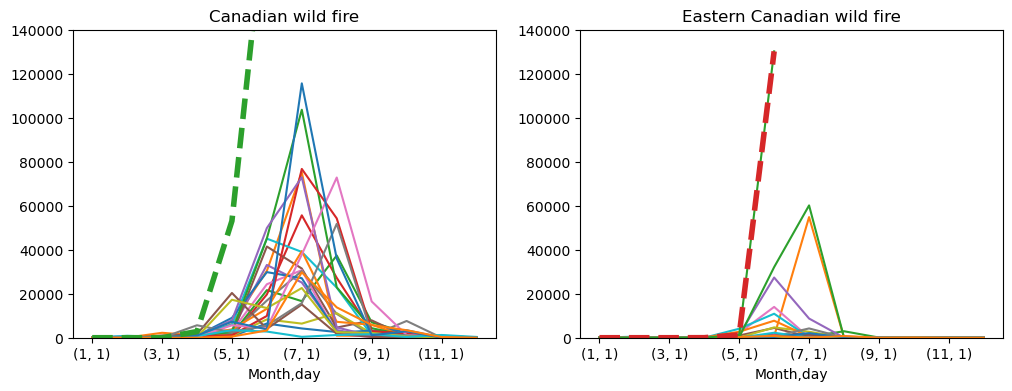

In [30]:
fig2, ax2 = plt.subplots(1, 2, figsize=(12, 4))
cDataset2.loc[:, 2001:2022].plot(ax=ax2[0], legend=False, label='Other years')
cDataset2[2023].plot(ax=ax2[0],  label='2023', style='--', linewidth=4.0)
ax2[0].set_ylim(0, 140000)
ax2[0].set_title('Canadian wild fire')

ecDataset2.plot(ax=ax2[1], legend=False, label='Other years')
ecDataset2[2023].plot(ax=ax2[1],  label='2023', style='--', linewidth=4.0)
ax2[1].set_ylim(0, 140000)
ax2[1].set_title('Eastern Canadian wild fire')
# ax2[0].legend()
# ax2[1].legend()
plt.show()